# Programming Exercise 8: Anomaly Detection and Recommender Systems

# Introduction
In this exercise, we will implement the anomaly detection algorithm and apply it to detect failing servers on a network. In the second part, we will use collaborative filtering to build a recommender system for movies. 

# 1 Anomaly detection
In this exercise, we will implement an anomaly detection algorithm to detect anomalous behavior in server computers. The features measure the throughput (mb/s) and latency (ms) of response of each server. While the servers
were operating, we collected m = 307 examples of how they were behaving, and thus have an unlabeled dataset $\{x^
1, . . . , x^m\}$. We suspect that the vast majority of these examples are “normal” (non-anomalous) examples of
the servers operating normally, but there might also be some examples of servers acting anomalously within this dataset.

We will use a Gaussian model to detect anomalous examples in your dataset. We will first start on a 2D dataset that will allow you to visualize what the algorithm is doing. On that dataset we will fit a Gaussian distribution and then find values that have very low probability and hence can be considered anomalies. After that, we will apply the anomaly detection algorithm to a larger dataset with many dimensions. 

In [11]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import scipy.stats

Visualizing example dataset for outlier detection.




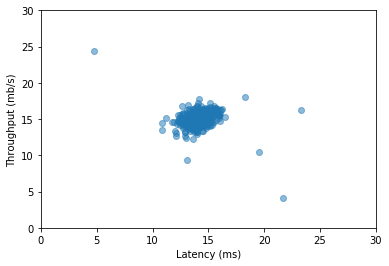

In [4]:
# ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easy to
#  visualize.
#
#  Our example case consists of 2 network server statistics across
#  several machines: the latency and throughput of each machine.
#  This exercise will help us find possibly faulty (or very fast) machines.

print('Visualizing example dataset for outlier detection.\n\n');

#  The following command loads the dataset. You should now have the
#  variables X, Xval, yval in your environment
data1 = scipy.io.loadmat('./ex8/ex8data1.mat')
X, Xval, yval = data1['X'], data1['Xval'], data1['yval']

#  Visualize the example dataset
plt.scatter(*X.T, marker='o', alpha=0.5)
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)');
plt.ylabel('Throughput (mb/s)');

## 1.1 Gaussian distribution
To perform anomaly detection, we will ﬁrst need to ﬁt a model to the data’s distribution. Given a training set $\{x^1,\ ...\ ,x^m\}$ (where $x^j \in \mathbb{R}^n$), you want to estimate the Gaussian distribution for each of the features $x_i$. For each feature i = 1...n, you need to ﬁnd parameters µ$_i$ and σ$^2_i$ that ﬁt the data in the i-th dimension $\{x^1_i , \ ... \ ,x^m_i \}$ (the i-th dimension of each example).The Gaussian distribution is given by:

$$ p(x;\mu,\sigma^2) = {1 \over \sqrt{2 \pi \sigma^2}} e^{-{{(x-\mu)}^2 \over 2 \sigma^2}}$$ where µ is the mean and σ2 controls the variance.

## 1.2 Estimating parameters for a Gaussian 
We can estimate the parameters, (µ$_i$ and σ$^2_i$), of the i-th feature by using the following equations. To estimate the mean and the variance, we will use: 

$$ \mu_i = {1 \over m} \sum_{j=1}^{m} x_i^j, \quad \sigma^2_i = {1 \over m} \sum_{j=1}^{m} {(x_i^j - \mu_i)}^2$$

The code in `estimateGaussian` implements the above equations. This function takes as input the data matrix X and should output an n-dimension vector mu that holds the mean of all the n features and another n-dimension vector sigma2 that holds the variances of all the features. We can implement this using a for-loop over every feature and every training example (though a vectorized implementation might be more eﬃcien). Note that in Octave/MATLAB, the var function will (by default) use $1 \over {m−1}$ , instead of $1 \over m$, when computing $\sigma^2_i$. The next part will visualize the contours of the ﬁtted Gaussian distribution. From the plot, we will see that most of the examples are in the region with the highest probability, while the anomalous examples are in the regions with lower probabilities.

In [28]:
def estimateGaussian(X):
    """
    ESTIMATEGAUSSIAN This function estimates the parameters of a 
    Gaussian distribution using the data in X
       [mu sigma2] = estimateGaussian(X), 
       The input X is the dataset with each n-dimensional data point in one row
       The output is an n-dimensional vector mu, the mean of the data set
       and the variances sigma^2, an n x 1 vector
    """
    m, n = X.shape
    mu = np.sum(X, axis = 0) / m
    sigma2 = np.sum((X - mu)**2, axis = 0) / m
    return mu, sigma2

def multivariateGaussian(X, mu, sigma2):
    return scipy.stats.multivariate_normal.pdf(X, mu, sigma2)

Visualizing Gaussian fit.




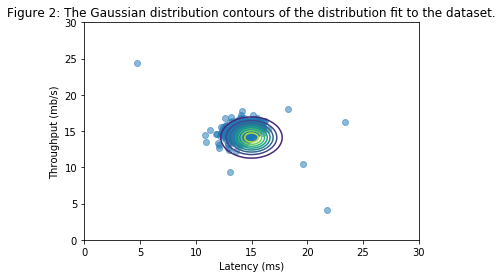

In [33]:
# ================== Part 2: Estimate the dataset statistics ===================
#  For this exercise, we assume a Gaussian distribution for the dataset.
#
#  We first estimate the parameters of our assumed Gaussian distribution, 
#  then compute the probabilities for each of the points and then visualize 
#  both the overall distribution and where each of the points falls in 
#  terms of that distribution.

print('Visualizing Gaussian fit.\n')

#  Estimate my and sigma2
mu, sigma2 = estimateGaussian(X)

#  Returns the density of the multivariate normal at each data point (row) of X
p = multivariateGaussian(X, mu, sigma2)

#  Visualize the fit
mu, sigma2 = estimateGaussian(X)

# Grid over which we will calculate J
x1 = np.linspace(0, 30, 100)
x2 = np.linspace(0, 30, 100)

# initialize J_vals to a matrix of 0's
z = np.zeros((len(x1), len(x2)))

# Fill out J_vals
for i in range(len(x1)):
    for j in range(len(x2)):
        t = [x1[i], x2[j]]
        z[i,j] = multivariate_normal.pdf(t, mu, sigma2)
        
plt.contour(x1, x2, z, levels=10)#, np.logspace(1e-50, 1e-20, 20))
#  Visualize the example dataset
plt.scatter(*X.T, marker='o', alpha=0.5)
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Figure 2: The Gaussian distribution contours of the distribution ﬁt to the dataset.')
plt.show()